In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.graph_objs as gobj
import plotly.express as px


In [20]:
data = pd.read_csv('heart_failure.csv')

In [21]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
data.groupby('sex').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
sex,,,,,,,,,,,,
0,59.777781,0.495238,476.780952,0.523810,40.466667,0.419048,279964.021619,1.384095,136.790476,0.038095,131.904762,0.323810
1,61.405500,0.396907,638.701031,0.360825,36.793814,0.314433,254370.249897,1.399175,136.536082,0.474227,129.371134,0.319588


In [23]:
#Sex - Gender of patient Male = 1, Female =0
#Age - Age of patient
#Diabetes - 0 = No, 1 = Yes
#Anaemia - 0 = No, 1 = Yes
#High_blood_pressure - 0 = No, 1 = Yes
#Smoking - 0 = No, 1 = Yes
#DEATH_EVENT - 0 = No, 1 = Yes

<AxesSubplot:xlabel='sex'>

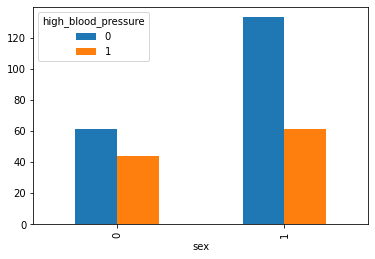

In [24]:
pd.crosstab(data.sex, data.high_blood_pressure).plot(kind = 'bar')

<AxesSubplot:xlabel='sex'>

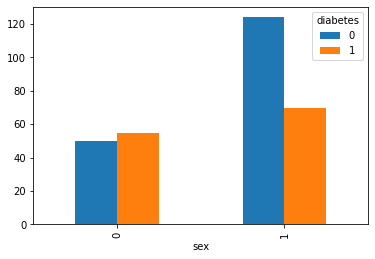

In [25]:
pd.crosstab(data.sex, data.diabetes).plot(kind = 'bar')

<AxesSubplot:xlabel='sex'>

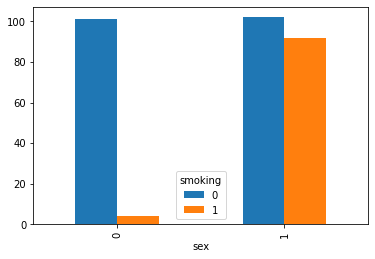

In [26]:
pd.crosstab(data.sex, data.smoking).plot(kind = 'bar')

In [27]:
x = data.drop(['DEATH_EVENT'],axis = 'columns')

In [28]:
y = data['DEATH_EVENT']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.1)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [34]:
model.score(x_test, y_test)

0.8666666666666667

In [35]:
import pickle
with open ('Heart_failure_pickle', 'wb') as f:
    pickle.dump(model,f)

In [36]:
with open ('Heart_failure_pickle', 'rb') as f:
    mp = pickle.load(f)